# 🧪 Análisis Exploratorio de Datos (EDA)
## Desempleo Región de Los Ríos (SU2) - Encuesta Nacional de Empleo (ENE)

### Introducción

Este notebook realiza un análisis exploratorio de los indicadores de desocupación en la Región de Los Ríos, segmentando por sexo y tramo etario, utilizando datos de la Encuesta Nacional de Empleo (ENE) del INE.  
El objetivo es identificar patrones, tendencias y grupos de mayor vulnerabilidad, para fundamentar análisis posteriores y recomendaciones de política pública.

---

### Carga y Revisión de Datos

- **Fuente:** INE - Encuesta Nacional de Empleo (ENE)
- **Cobertura:** Región de Los Ríos, 2010-2025
- **Variables clave:** periodo, valor, dimensión (sexo/tramo etario), categoría

Se verifica la estructura, duplicados y valores nulos para asegurar la calidad del dataset antes

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Cargar datos
df = pd.read_csv("../data/processed/poblacion_desocupada_combinado.csv")
df.head()

,indicador,periodo,valor,region,dimension,categoria
0,DES,2010-01-01/P3M,420.763708,11,tramo_edad,Y35T44
1,DES,2010-02-01/P3M,244.385161,11,tramo_edad,Y35T44
2,DES,2010-03-01/P3M,531.478140,11,tramo_edad,Y35T44
3,DES,2010-04-01/P3M,650.276185,11,tramo_edad,Y35T44
4,DES,2010-05-01/P3M,789.708634,11,tramo_edad,Y35T44


### 📋 Revisión de Calidad y Estructura de los Datos

A continuación, se revisa la estructura y calidad del dataset utilizando los siguientes comandos:


In [19]:
df.info()
df.duplicated().sum()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15292 entries, 0 to 15291
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   indicador  15292 non-null  object 
 1   periodo    15292 non-null  object 
 2   valor      15292 non-null  float64
 3   region     15292 non-null  object 
 4   dimension  15292 non-null  object 
 5   categoria  15292 non-null  object 
dtypes: float64(1), object(5)
memory usage: 716.9+ KB


indicador    0
periodo      0
valor        0
region       0
dimension    0
categoria    0
dtype: int64

## 🕵️‍♂️ Distribución Temporal del Desempleo

Visualizamos la evolución del desempleo desde 2010 hasta 2025.

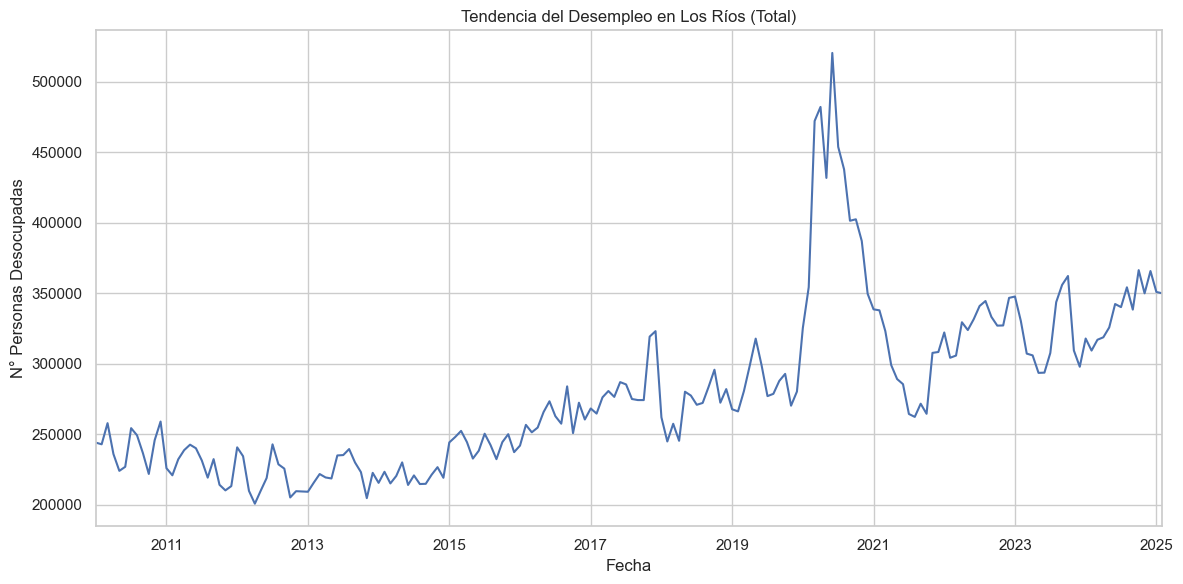

In [12]:
df["periodo"] = pd.to_datetime(df["periodo"].str[:10])  # limpiar el formato P3M

# Agrupado por mes promedio
df.groupby("periodo")["valor"].sum().plot()
plt.title("Tendencia del Desempleo en Los Ríos (Total)")
plt.xlabel("Fecha")
plt.ylabel("N° Personas Desocupadas")
plt.tight_layout()
plt.show()

## 📊 Análisis por Tramo Etario

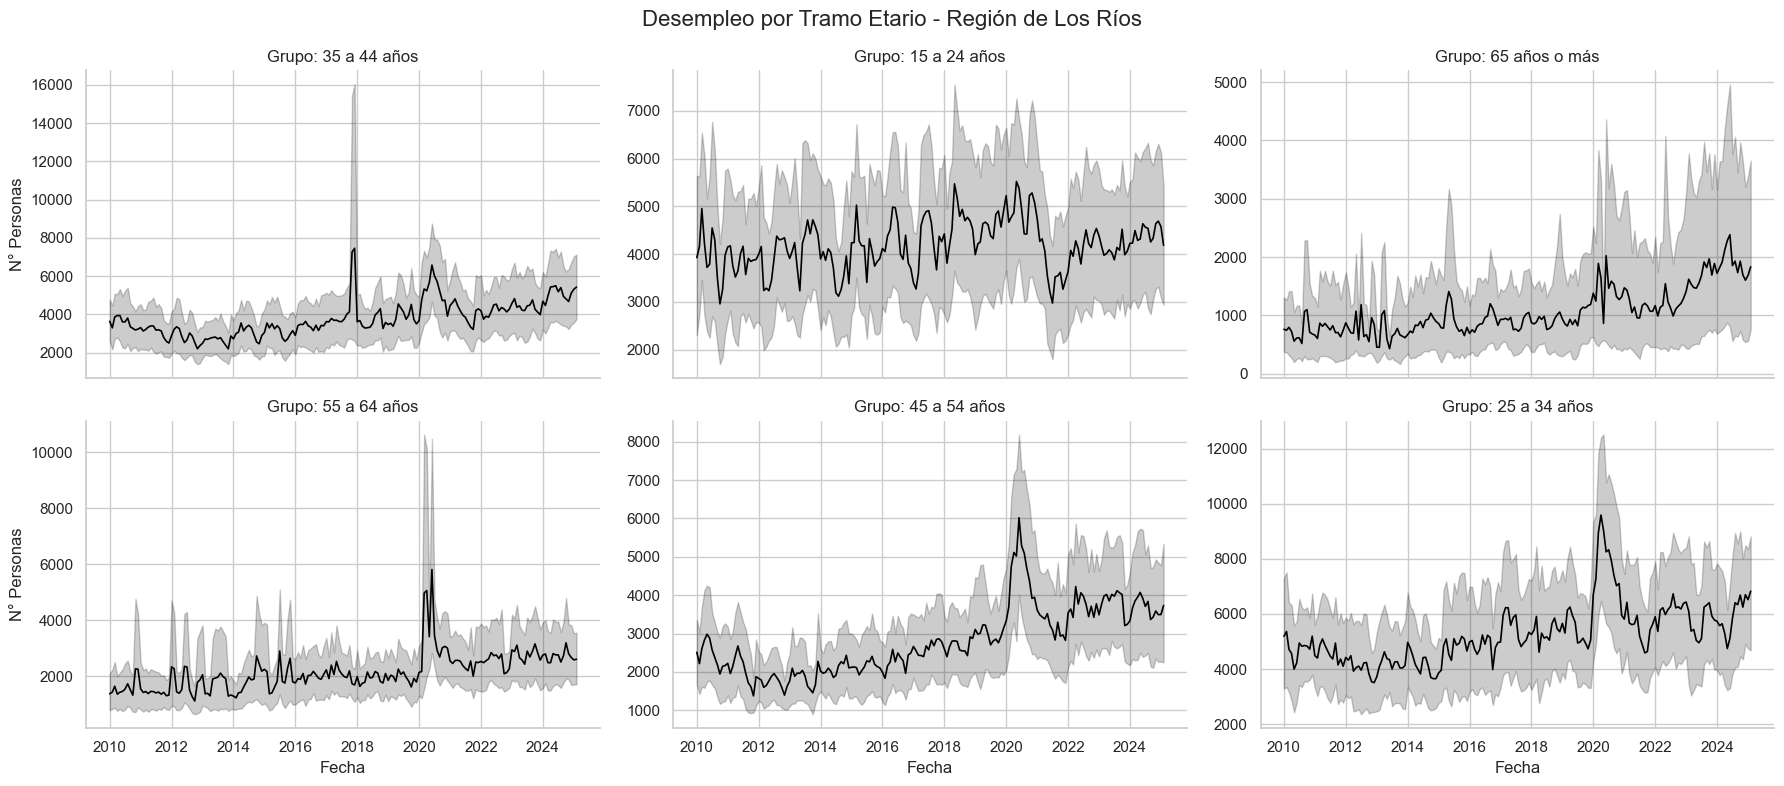

In [26]:
# Configuraciones visuales
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (14, 10)

# Cargar el dataset procesado
df = pd.read_csv("../data/processed/poblacion_desocupada_combinado.csv")

# Filtrar solo datos por tramo etario
df_edad = df[df["dimension"] == "tramo_edad"].copy()

# Asegura que 'periodo' es datetime
df_edad["periodo"] = pd.to_datetime(df_edad["periodo"].astype(str).str[:10])

# Renombrar columna para claridad
df_edad.rename(columns={"categoria": "Edad"}, inplace=True)

# Traducir códigos a etiquetas legibles
etiquetas = {
    "Y15T24": "15 a 24 años",
    "Y25T34": "25 a 34 años",
    "Y35T44": "35 a 44 años",
    "Y45T54": "45 a 54 años",
    "Y55T64": "55 a 64 años",
    "Y_GE65": "65 años o más",
    "_T": "Total"
}
df_edad["Edad"] = df_edad["Edad"].map(etiquetas)

# (Opcional) Quitar "Total" si quieres gráficos por grupo
df_edad = df_edad[df_edad["Edad"] != "Total"]

# Crear subgráficos por grupo etario
g = sns.FacetGrid(df_edad, col="Edad", col_wrap=3, height=4, aspect=1.5, sharey=False)
g.map(sns.lineplot, "periodo", "valor", color="black", linewidth=1.2)

# Mejorar títulos y etiquetas
g.set_titles("Grupo: {col_name}")
g.set_axis_labels("Fecha", "N° Personas")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Desempleo por Tramo Etario - Región de Los Ríos", fontsize=16)

plt.tight_layout()
plt.show()

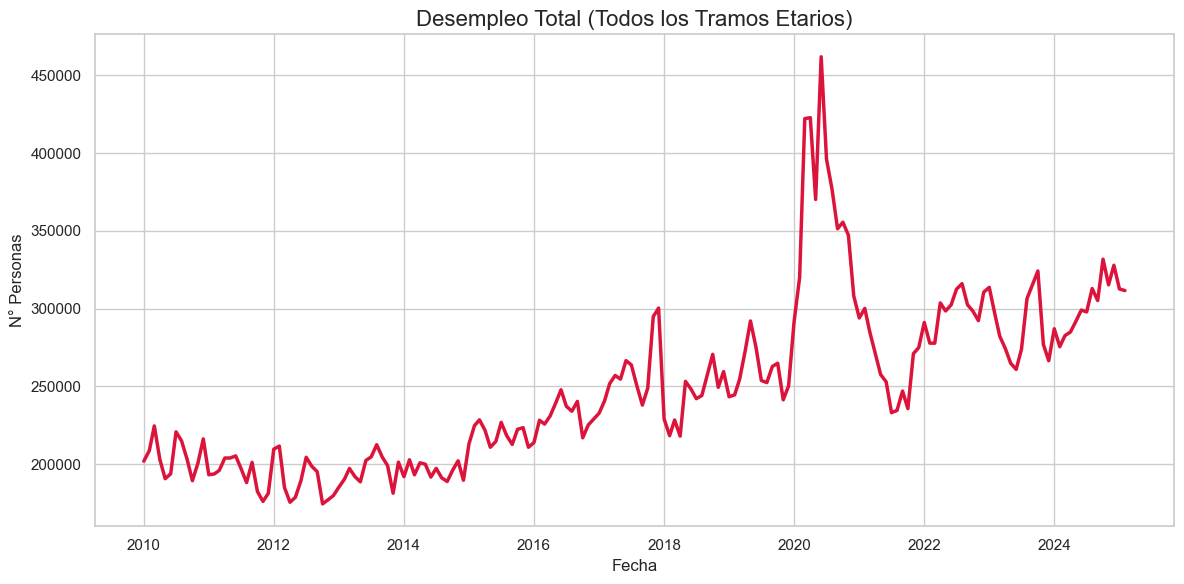

In [27]:
df_total_suma = df_edad.groupby("periodo")["valor"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_total_suma, x="periodo", y="valor", color="crimson", linewidth=2.5)
plt.title("Desempleo Total (Todos los Tramos Etarios)", fontsize=16)
plt.xlabel("Fecha")
plt.ylabel("N° Personas")
plt.grid(True)
plt.tight_layout()
plt.show()